#SMS SPAM CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

#READ DATASET AND DO PREPROCESSING

In [ ]:
df = pd.read_csv(r'spam.csv',encoding='latin-1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

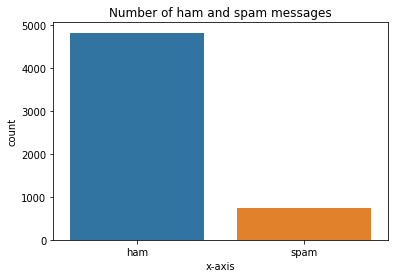

In [ ]:
sns.countplot(df.v1)
plt.xlabel('x-axis')
plt.title('Number of ham and spam messages')

#CREATE INPUT VECTORS AND PROCESS LABELS

In [ ]:
X = df.v2
Y = df.v1

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
Y = Y.reshape(-1,1)

#SPLIT THE TRAINING AND TESTING DATA

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

#PROCESS THE DATA

In [ ]:
max_words = 1000
max_len = 150

In [ ]:
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

In [ ]:
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

#CREATE MODELS AND ADD LAYERS

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('tanh')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy','mse','mae'])

#FIT THE MODEL

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=100,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/100
28/28 [==============================] - 13s 460ms/step - loss: 0.0961 - accuracy: 0.9778 - mse: 0.0358 - mae: 0.1438 - val_loss: 0.1271 - val_accuracy: 0.9832 - val_mse: 0.0568 - val_mae: 0.2060
Epoch 2/100
28/28 [==============================] - 14s 507ms/step - loss: 0.0728 - accuracy: 0.9885 - mse: 0.0607 - mae: 0.2129 - val_loss: 0.1175 - val_accuracy: 0.9821 - val_mse: 0.0766 - val_mae: 0.2416


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 3s 92ms/step - loss: 0.1390 - accuracy: 0.9821 - mse: 0.0779 - mae: 0.2393


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.139
  Accuracy: 0.982


#SAVE THE MODEL

In [ ]:
model.save(r"C:\Users\aruna\OneDrive\Desktop\model_lSTM.h5")

#TEST THE MODEL


In [ ]:
from tensorflow.keras.models import load_model
m2 = load_model(r"C:\Users\aruna\OneDrive\Desktop\model_lSTM.h5")

In [ ]:
m2.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 4s 68ms/step - loss: 0.1390 - accuracy: 0.9821 - mse: 0.0779 - mae: 0.2393


[0.13899557292461395,
 0.9820627570152283,
 0.07788368314504623,
 0.23931345343589783]